<div style='text-align:center'>
<br>
    <h1>Singular Value Decomposition: SVD</h1><br>
<br>
<br></div>

This notebook demonstrates SVD, but before getting to that its important to give a quick overview of principle components analysis.

## Principle Components Analysis

Principle components analysis (PCA) allows us to reduce the dimensionality of a dataset. This can be very useful when there are a large number of features and it is difficult to determine which ones are useful. It is also useful for visualizing high dimensional data by reducing it to 2 or 3 dimensions.

The principle components within a dataset capture the variation within the data but do not necessarily match up with the actual features in the data. The principle component with the most variation would be the first principle component, the next most variation the second PC, and so on. Why do we care about the most variation? Imagine we're looking at a pendulum swing and want to see how far it swings. If we are at an angle looking at the pendulum so that it swings directly away and toward us we have very little idea how far it is swinging because we can see very little variation in its position over time. If we are perpendicular to the movement of the pendulum we see the most variation in its position over time. The more variation, the more information we can gain.

We'll be using the covariance matrix of the dataset $X$, which will be denoted as $\Sigma_x$. The data needs to be centered before we create the covariance matrix. To do this we subtract the mean so that we have a mean of 0 and variance of 1.

With the centered data we are going to make a new axis using a unit vector $q$ where $||q||_2=1$ (unit vector has L2 norm of 1). We'll project the data $X$ onto this new axis $q$ and write the variance as $a = q^Tx$. We want to find the $q$ with the maximum variance subject to the constraint that $||q||_2=1.

Because the data is centered the variance if $\sigma_{a}^2 = E[A^2]$, assuming $A$ contains all $a$ values.

We can rewrite this using the equation for $a$ as $\sigma_{a}^2 = E[a^2] = E[aa] = E[q^Txx^Tq] = q^TE[xx^T]q$

$E[xx^T]$ is the covariance matrix of our centered dataset which we'll denote as $\Sigma_x$.

Why is this?

If the data is not centered it would be $E[(x-\hat{x})(x-\hat{x})^T]$, however because we centered it our dataset now has a mean of 0 so $\hat{x} = 0$ therefore $x-\hat{x} = x$ and $E[(x-\hat{x})(x-\hat{x})^T] = E[xx^T]$.

We can turn this into an optimization problem and solve for the Lagrangian multiplier where $max_q$ $q^T\Sigma_x q$ such that $q^Tq = 1$

$L = q^T\Sigma_x q - \lambda (q^Tq - 1)$

Take the derivative of the above:
- $\Delta_q L = 2\Sigma_x q - 2\lambda q$

We can drop the 2's so we have 
- $\Delta_q L = \Sigma_x q - \lambda q = 0$
- $\Sigma_x q = \lambda q$

This is the equation used to solve for eigenvectors and eigenvalues.

Where:
- $\Sigma_x$ is the covariance matrix of the dataset $X$
- $q$ is the eigenvectors 
- $\lambda$ is the eigenvalues

The principle components are the eigenvectors in the covariance matrix $\Sigma_x$. Obtaining these values is done using a library of your choice (numpy in this notebook). Numpy returns these in order from smallest to largest, so take that into account when using the function.

We can define a unitary (orthonormal) matrix $Q = 
\begin{bmatrix}
| && | && \dots && | \\ 
q_1 && q_2 && \dots && q_m \\
| && | && \dots && | \\
\end{bmatrix}
$

We can define a matrix of diagonal $\lambda$ values $\Lambda = 
\begin{bmatrix}
\lambda_1 && 0 && \dots && 0 \\ 
0 && \lambda_2 && \dots && \vdots\\
\vdots && \vdots && \ddots && 0 \\
0 && \dots && 0 && \lambda_m \\
\end{bmatrix}
$

$Q$ is orthonormal because $Q^TQ=QQ^T=I$

And now write $\Sigma_x Q = Q \Lambda$ which can be rewritten $\Sigma_x = Q \Lambda Q^{-1}  Q \Lambda Q^T$.

This is spectral decomposition (we can transpose Q due to its orthonormal property instead of taking the inverse) and can also be written as $\Sigma_x = \Sigma_{i=1}^m \lambda_i q_i q_i^T$. An interesting thing here is that anywhere $\lambda_i$ is 0 it reduces this sum. If every value was calculated this matrix would quickly get out of hand since $q_i q_i^T$ is the outer product. By stopping this calculation before reaching the full outer product we can potentially significantly reduce the computational cost, and improve the speed, of finding the eigen vectors and values. This is known as truncation. Instead of summing from $1$ to $m$ we can sum from $1$ to $r$ where $r<m$ and $r$ can be chosen based on applicable criteria.

## Singular Value Decomposition

With that out of the way we can look at using SVD to obtain the principle components from the centered dataset. SVD makes use of this where $\Sigma_x = USV^T$. Numpy can calculate this for us using the SVD() function. This is similar to spectral decomposition but slightly different, one reason being $U$ is not equal to $V$. $U$ is the left singular vector, $V$ the right. The values of $U$ are the principle components. The values of $S$ are the singular values which are square roots of the eigenvalues of the covariance matrix.

Why use SVD instead of PCA? It can be much less computationally expensive. If PCA is used on this dataset the computer runs out of memory, whereas with SVD it runs quickly. SVD returns principle components and it is commonly seen used in place of PCA.

This notebook uses SVD to extract the principle components from an image dataset, then reconstruct the images using a select number of principle components. This is a method of compression, as less elements are required to reconstruct the image than the original image contains.

### Algorithm

1. Organize the image data so that each image is a flattened column vector
    - Each row will be a pixel value, each column an image
    - Dimensions will be image width x image heigh by the number of images in the dataset
2. Center the dataset
    - Center the data by subtracting the row average from each row
    - This is because each image is a column, so we want the average pixel for each row across all images
3. Perform SVD
    - Call numpy's SVD function
    - This returns $U,S,V^T$
    - $U$ are the principle components we'll use to compress the images
4. Reconstruct the image using princple components
    - We can truncate $U$ by taking the first $r$ principle components and project these onto an image from the original dataset (the uncentered images)
    - The calculation will look like $UU^Tx$ where $x$ is an image as a column vector from the dataset and $U$ has been truncated to take all rows but only the first $r$ columns.
    - We can then reshape this result into the size of the original image and display it

## Complexity

When using truncated SVD the time and space complexity is linear.

There are some other functions throughout the notebook to help visualize the images and results.

---

## Code

In [1]:
import numpy as np
np.random.seed(1)
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import copy

In [2]:
# load data from matlab file to python dict
data = scipy.io.loadmat('allFaces.mat')

In [3]:
datapoints = data['faces']
labels = data['nfaces']
n = np.squeeze(data['n'])
m = np.squeeze(data['m'])

In [4]:
labels

array([[64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63,
        63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64]], dtype=uint8)

In [5]:
datapoints.shape

(32256, 2410)

In [6]:
def plot_each_face(data, labels, n, m, num):
    """plots first picture of first 36 people in dataset
    params:
        data, labels: data and labels
        n,m: dims of images
        num: tup() of rows and columns"""
    
    row, col = num
    fig, axes = plt.subplots(row, col, figsize = (10,15))

    # get indices of first faces
    idx = [0]
    for la in labels[0]:
        last = idx[-1]
        idx.append(la + last)
    
    d = data[:, idx[:int(row*col)]]
    
    i = 0
    for r in range(row):
        for c in range(col):
            if i < int(row*col):
                img = d[:,i]
                img = img.reshape(m,n).swapaxes(1,0)
                plt.subplot(row, col, i+1)
                plt.imshow(img, cmap=cm.Greys_r)
                plt.title(f"Person {i+1}")
                i+=1
    plt.tight_layout()
    plt.show()

In [7]:
def plot_face(data, labels, person, n, m, num):
    """plots all pictures of given person
    params:
        data, labels: data and labels
        n,m: dims of images
        person: int() of person to show
        num: tup() of rows and columns"""
    
    row, col = num
    fig, axes = plt.subplots(row, col, figsize = (15,15))

    # get indices of first faces
    idx = [0]
    for la in labels[0]:
        last = idx[-1]
        idx.append(la + last)

    d = data[:, idx[person-1]:idx[person]]
    rang = int(idx[person] - idx[person-1])    

    i = 0
    for r in range(row):
        for c in range(col):
            if i < rang:
                img = d[:,i]
                img = img.reshape(m,n).swapaxes(1,0)
                plt.subplot(row, col, i+1)
                plt.imshow(img, cmap=cm.Greys_r)
                plt.title(f"Person {person}: {i+1}")
                i+=1
    plt.tight_layout()
    plt.show()

### *Plot first image from each person.*

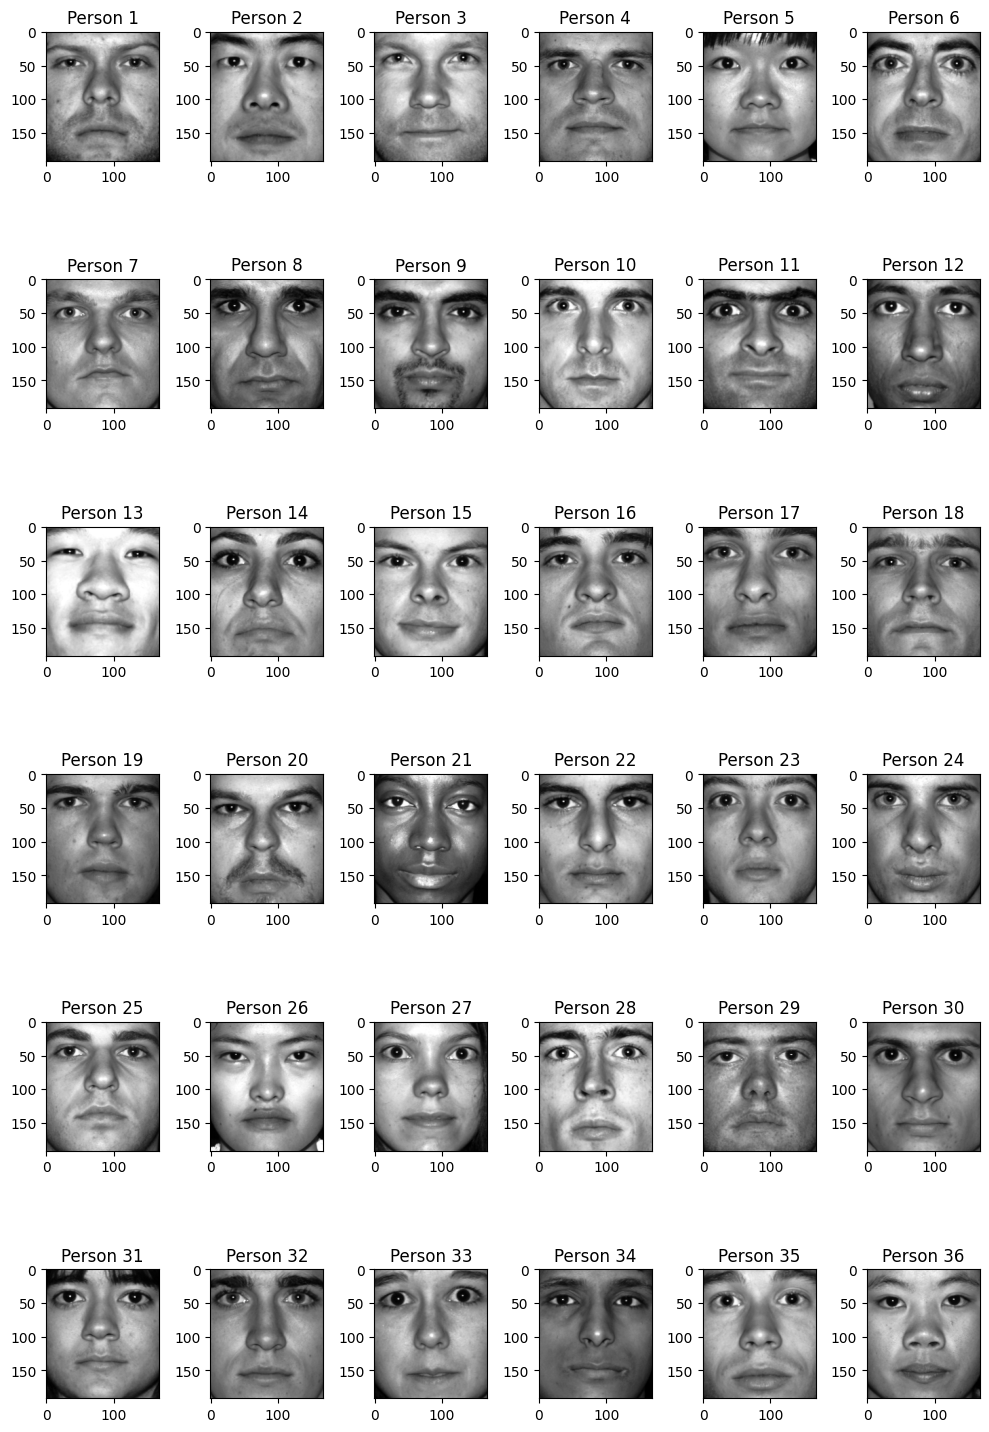

In [8]:
plot_each_face(datapoints, labels, n, m, (6,6))

### *Plot all images for given person*

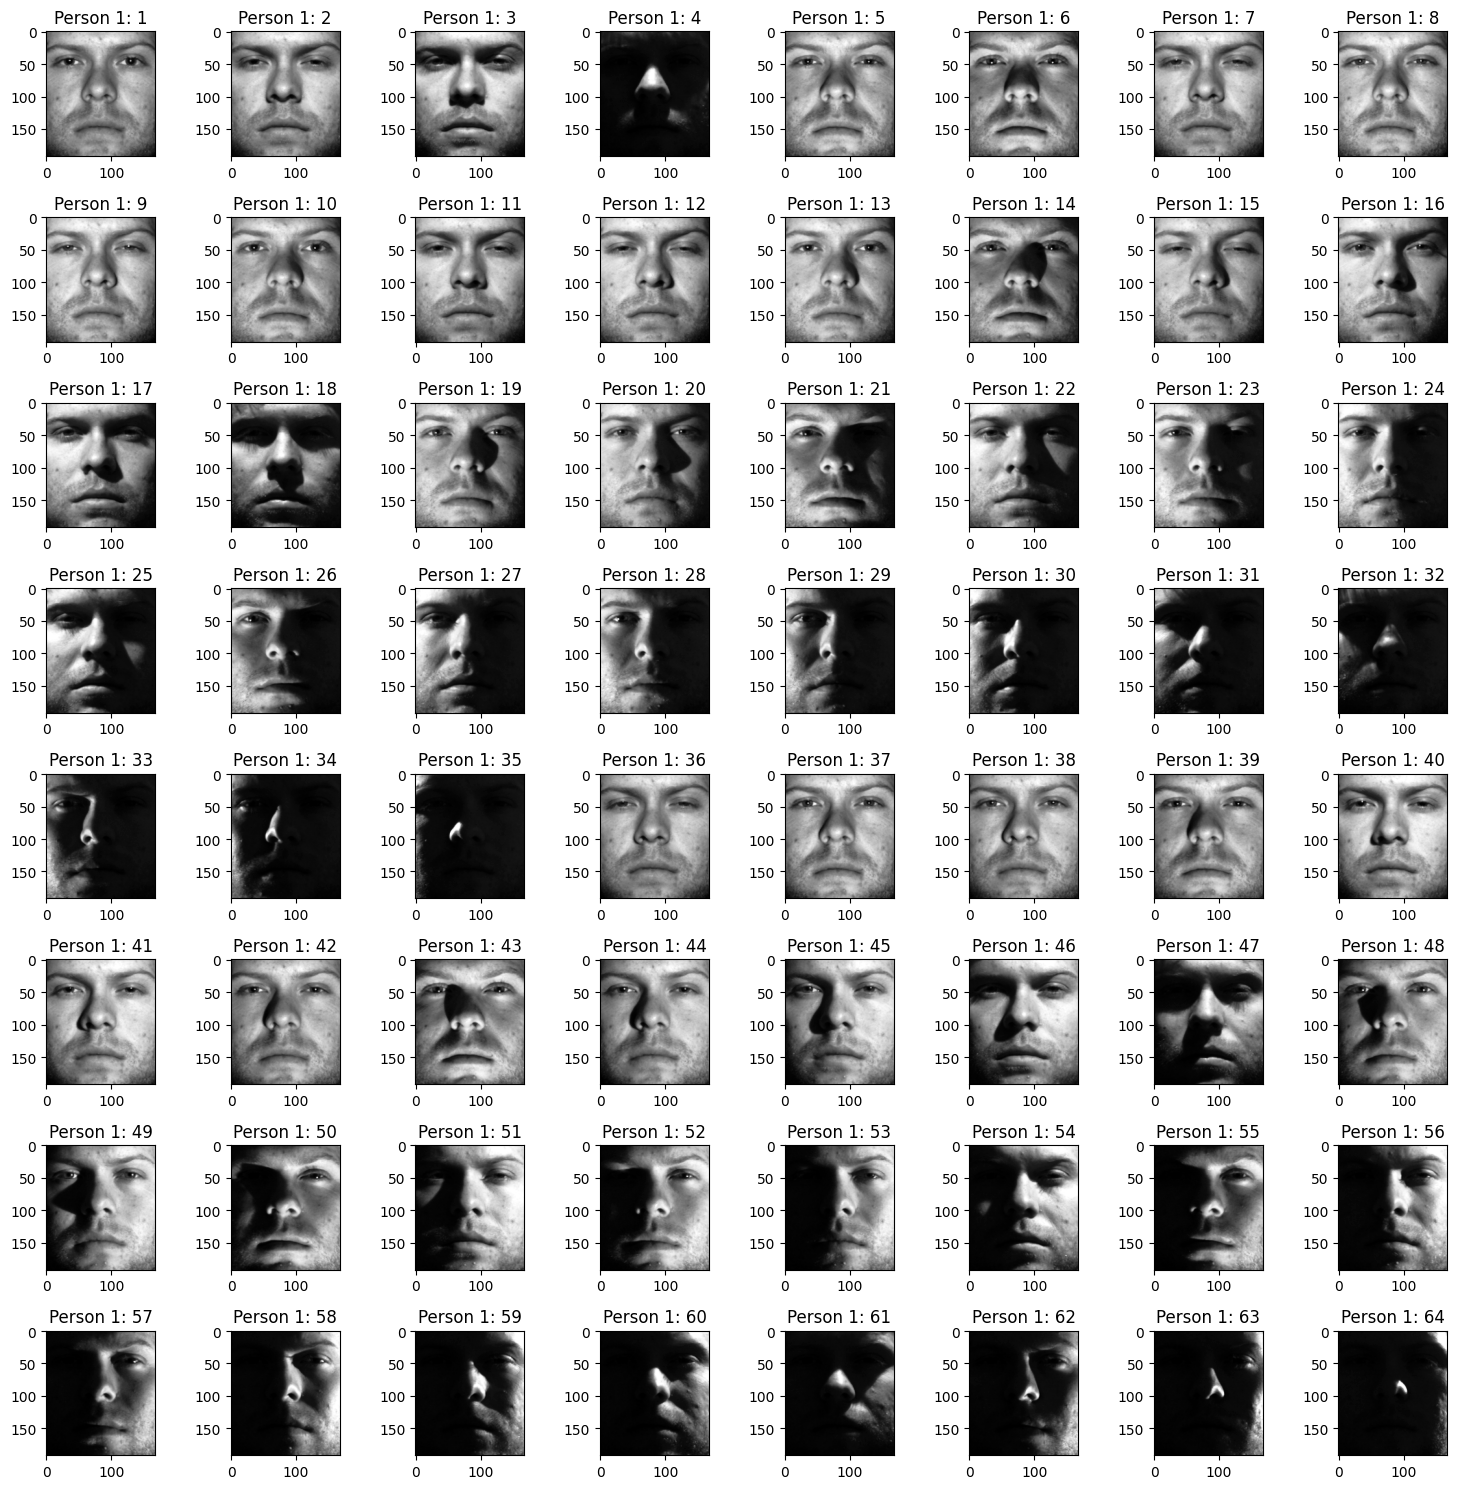

In [9]:
plot_face(datapoints, labels, 1, n, m, (8,8))

In [11]:
class PCA():
    def __init__(self, x, **kwargs):
        self.pc = kwargs.get("pc", 2)
        self.r = kwargs.get("r", 100)
        self.n = kwargs.get('n', None)
        self.m = kwargs.get('m', None)
        self.x = x # pass in as column vector (pixels, num_imgs)

        
    def svd(self):
        """achieves pca through svd
        X = USV^T (V is returned transposed by numpy)
        """
        
        if self.x.shape[1] == 1:
            x = self.x.reshape(self.im_sz, self.im_sz)
            U,S,V = np.linalg.svd(x, full_matrices = False)
        else:
            x_ = np.sum(self.x, axis = 1).reshape(-1,1) / self.x.shape[1]
            x = self.x - x_
            U,S,V = np.linalg.svd(x, full_matrices = False)

        assert np.allclose(x, np.dot(U * S, V))

        self.U, self.S, self.V = U, S, V

    
    def plot_sv(self, **kwargs):
        """determines cumulative energy for PC selection"""
        
        plt.plot(range(self.S.shape[0]), np.log(self.S))
        plt.title("Log scaled singular values")
        plt.xlabel("Principle Components")
        plt.ylabel("Log scaled singular value")
        plt.show()


    def show_avg_img(self):
        """plots avg of images"""
        
        x_ = np.sum(self.x, axis = 1).reshape(-1,1) / self.x.shape[1]
        im = x_.reshape(self.m, self.n).swapaxes(1,0)
        plt.figure(figsize = (3,3))
        plt.imshow(im, cmap = cm.Greys_r)
        plt.title(f"Average image")
        plt.show()        
        
    
    def project_pca(self, **kwargs):
        """projects select number of principle components onto image
        U @ U.T @ X
        (pixels,r)(r, pixels)(pixels,1) = (pixels, 1)
        """

        idx = kwargs.get("idx", 0) # index of image to show
        r = kwargs.get("r", self.r)

        result = self.U[:,:r] @ self.U[:,:r].T @ self.x[:,idx].reshape(-1,1)
        im = result.reshape(self.m, self.n).swapaxes(1,0)
        plt.figure(figsize = (3,3))
        plt.imshow(im, cmap = cm.Greys_r)
        plt.title(f"Reconstructed image using first {r} principle components")
        plt.show()


In [12]:
def plot_eigen_faces(data, n, m, num):
    """plots first 54 eigen faces
    params:
        data: dataset
        n,m: dims
        num: number of faces to plot"""
    
    row, col = 6, 9
    fig, axes = plt.subplots(row, col, figsize = (10,10))
    
    i = 0
    for r in range(row):
        for c in range(col):
            if i < num:
                img = data[:,i]
                img = img.reshape(m,n).swapaxes(1,0)
                plt.subplot(row, col, i+1)
                plt.imshow(img, cmap=cm.Greys_r)
                plt.title(f"Eigenface {i+1}")
                i+=1
    plt.tight_layout()
    plt.show()

In [ ]:
# only loading the first 36 people
x = datapoints[:,:-128] # the last 2 people each have 64 images so stopping there for 36 people
x.shape

### Part 1

Calculate the average face picture and display it.

In [14]:
pca = PCA(x,
          n = n,
          m = m)
pca.svd()

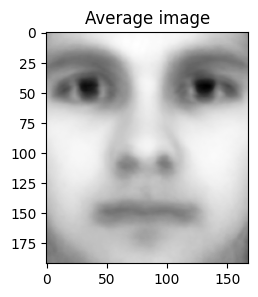

In [15]:
pca.show_avg_img()

### Part 2

*Calculate all singular values and singular vectors of X. Reshape these U vectors to 2-dimensional pictures of size 192 by 168. These are our eigen faces. Plot the first 54 eigen faces.*

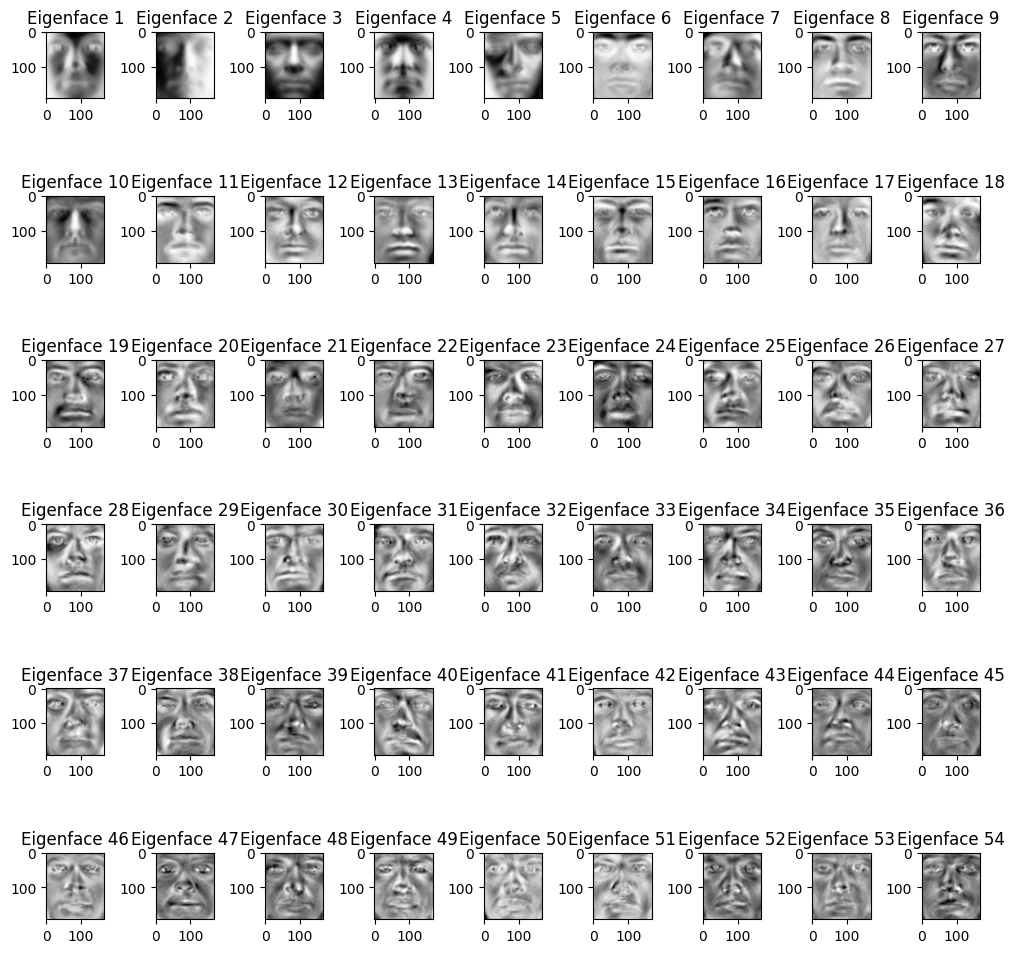

In [16]:
plot_eigen_faces(pca.U, n, m, 54)

*We'll compute the inner product of the first and the 5th eigen faces (do the computations with vectors to see if they are in fact orthogonal (the result should be 0).

In [17]:
print(f"Inner product of 1st and 5th eigen faces {(pca.U[:,0] @ pca.U[:,5].T):.5f}")
print(f"Inner product of 10th and 15th eigen faces {(pca.U[:,10] @ pca.U[:,15].T):.5f}")

Inner product of 1st and 5th eigen faces -0.00000
Inner product of 10th and 15th eigen faces -0.00000


### Part 3

*Now let’s decompose the first picture of person # 37 to these eigen faces. Lets plot the approximation of vector V as a 2-dimensional picture for r=5.*

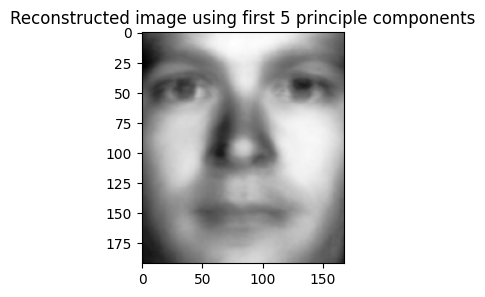

In [18]:
pca.project_pca(idx = 37, r = 5)

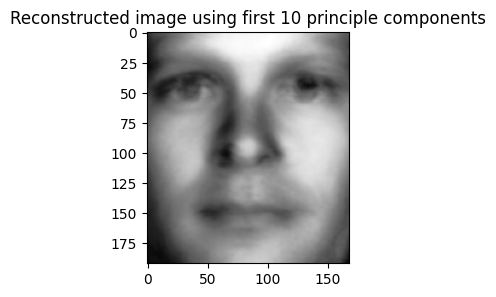

In [19]:
pca.project_pca(idx = 37, r = 10)

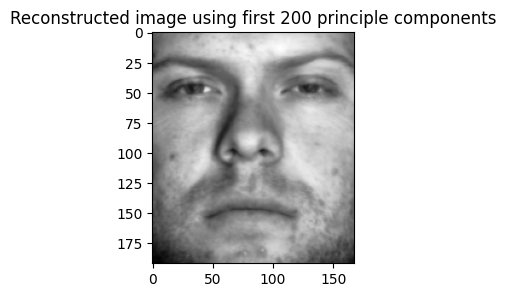

In [20]:
pca.project_pca(idx = 37, r = 200)

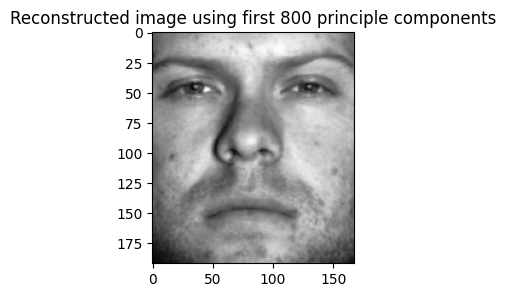

In [21]:
pca.project_pca(idx = 37, r = 800)

*Do you think you can find a good approximation of the picture with r=100?*

It would likely work, lets see.

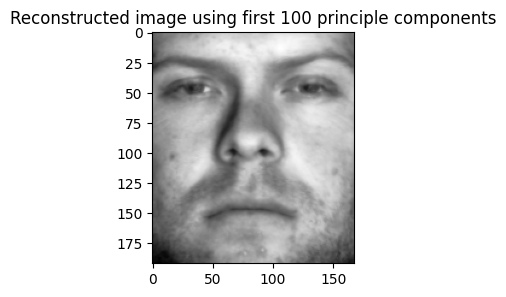

In [22]:
pca.project_pca(idx = 37, r = 100)

### Part 4.
*We can plot singular values (in a semi-logarithmic scale, horizontal axis representing the index, vertical axis representing the value of the singular value, vertical axis is scaled logarithmically). Do you see a good point for truncation?*

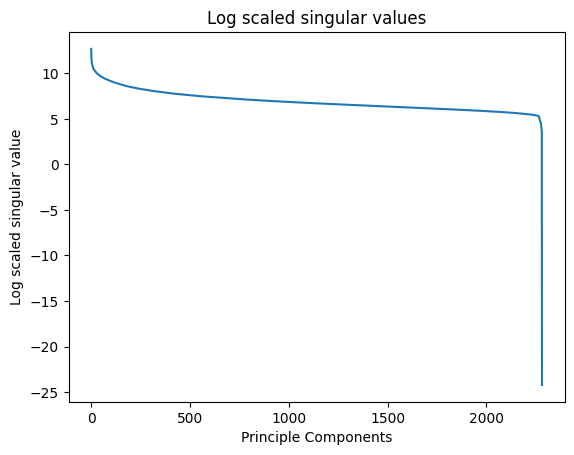

In [23]:
pca.plot_sv()

### Part 5. 

*Lets get all 64 different pictures of Person # 2. How much of eigen face number 5 do we have in each picture of person # 2? ( For instance, if 𝑉1 is the vector that represents the first picture of person # 2, and 𝑈(5) is the 5th eigen face, 𝛼 = (𝑉1) 𝑇 𝑈(5), we have 𝛼 amount of 5th eigen face in the first picture of person 2).*

*How much of each eigen face 5 do we have in every picture of person # 2?*

*How much of each eigen face 6 do we have in every picture of person # 2?*

In [24]:
def calc_alpha(p1, p2, pc1, pc2, data = datapoints, labels = labels, pca = pca):
    
    idx = [0]
    for la in labels[0]:
        last = idx[-1]
        idx.append(la + last)
    
    p_1 = data[:, idx[p1-1]:idx[p1]]
    p_2 = data[:, idx[p2-1]:idx[p2]]
    pc_1 = pca.U[:,pc1]
    pc_2 = pca.U[:,pc2]

    print(f"Amount of each eigen face 5 in every picture of person #{p1}: {sum(p_1.T @ pc_1)}")
    print(f"Amount of each eigen face 6 in every picture of person #{p1}: {sum(p_1.T @ pc_2)}")

In [25]:
calc_alpha(p1 = 2, p2 = 7, 
         pc1 = 5, pc2 = 6, 
         data = datapoints, labels = labels, pca = pca)

Amount of each eigen face 5 in every picture of person #2: 72955.20589436256
Amount of each eigen face 6 in every picture of person #2: -874.9047521631351


In [26]:
def plot_pcs(p1, p2, pc1, pc2, data = datapoints, labels = labels, pca = pca):
    """plots selected 2 principle components for selected persons"""

    idx = [0]
    for la in labels[0]:
        last = idx[-1]
        idx.append(la + last) 
    
    p_1 = data[:, idx[p1-1]:idx[p1]]
    p_2 = data[:, idx[p2-1]:idx[p2]]
    pc_1 = pca.U[:,pc1]
    pc_2 = pca.U[:,pc2]
    p1x = p_1.T @ pc_1
    p1y = p_1.T @ pc_2
    p2x = p_2.T @ pc_1
    p2y = p_2.T @ pc_2
    
    plt.scatter(p1x, p1y, color = 'black', marker = 'd', label = f'person {p1}')
    plt.scatter(p2x, p2y, color = 'red', marker = '^', label = f'person {p2}')
    plt.title(f"Plot of persons {p1} and {p2} and PCAs {pc1} and {pc2}")
    plt.xlabel(f"PCA {pc1}")
    plt.ylabel(f"PCA {pc2}")
    plt.legend()
    plt.show()

### Part 6

*We'll plot a 2-dimensional graph in which the horizontal axis is the 5th eigen face and vertical axis is the 6th eigen face. We'll mark person 2 in black and also person 7 in red. This data is now much more manageable and linearly separable.*

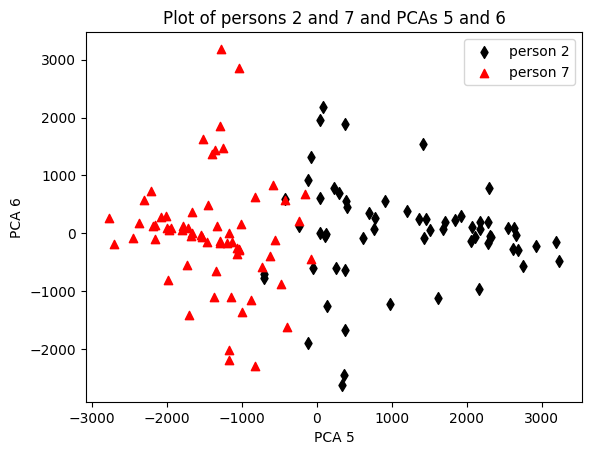

In [27]:
plot_pcs(p1 = 2, p2 = 7, 
         pc1 = 5, pc2 = 6, 
         data = datapoints, labels = labels, pca = pca)